In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Find best values

In [4]:
size_df = pd.read_json("./outputs/full_results2.jsonl", orient="records", lines=True) 

In [20]:
df = size_df[["function", "population_size", "best_value", "maximums"]]

In [21]:
def multisearch(df: pd.DataFrame, kv: dict):
    global_mask = None
    for key, value in kv.items():
        if global_mask is None:
            global_mask = df[key] == value
        else:
            global_mask &= (df[key] == value)
    return df[global_mask]

In [22]:
def indexed_explode(df: pd.DataFrame, by: str, index_colname: str = "rank"):
    assert by in df.columns

    tempdf = df[[by]].copy()
    tempdf["__temp"] = range(len(tempdf))
    tempdf = tempdf.explode(by)

    newdf = df.explode(by)
    newdf[index_colname] = tempdf.groupby(by="__temp").cumcount()

    return newdf

Text(0, 0.5, 'Najlepsza znaleziona wartość')

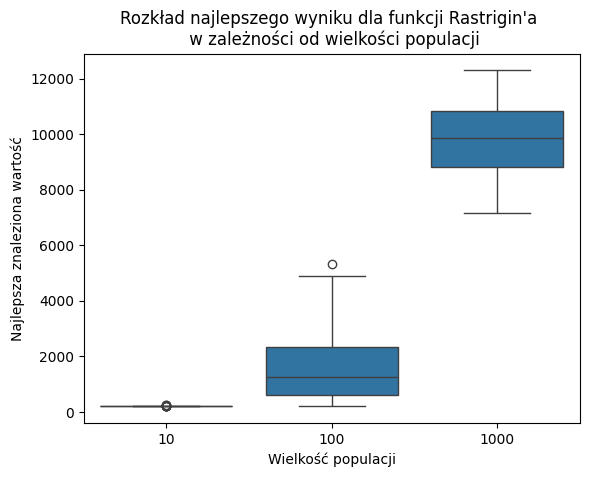

In [23]:
sns.boxplot(
    y = "best_value",
    x = "population_size",
    data = df[df["function"] == "rastrigin10D"]
)
plt.title("Rozkład najlepszego wyniku dla funkcji Rastrigin'a \n w zależności od wielkości populacji")
plt.xlabel("Wielkość populacji")
plt.ylabel("Najlepsza znaleziona wartość")

In [ ]:
rdf = df[df["function"] == "rastrigin10D"]

plot_df = indexed_explode(rdf[["maximums", "population_size"]], "maximums", index_colname="timestep")

Text(0, 0.5, 'Najlpesza wartość')

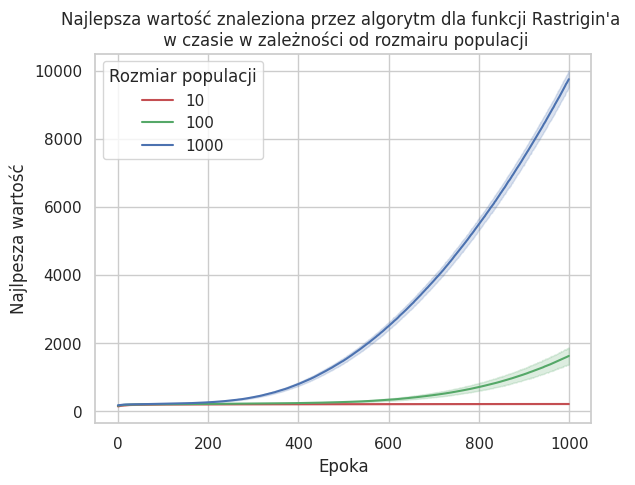

In [33]:

# Plot the responses for different events and regions
sns.set(style="whitegrid")
sns.lineplot(x="timestep", y="maximums", hue="population_size", palette={10: "r", 100: "g", 1000: "b"}, data = plot_df)
plt.title("Najlepsza wartość znaleziona przez algorytm dla funkcji Rastrigin'a \n w czasie w zależności od rozmairu populacji")
plt.legend(title="Rozmiar populacji")
plt.xlabel("Epoka")
plt.ylabel("Najlpesza wartość")